Do an Exploratory Data Analysis, including the necessary data transformation and cleaning, on the data (or a part of) you have decided to use for your business case. That is, load the data into R in a Jupyter notebook. Look at what variables you have and what their scale of measurement and types are. Do the necessary transformation such that the variables are in a format in R you can work with. Then investigate the individual variables and their distribution using plotting and descriptive statistics. Finally, select some pairs of variable for which you think their could be an interesting relationship and plot the relationship and calculate the relevant descriptive statistics. Finally, upload the notebook here.

<h1> Exploratory data analysis <h1>
<h3> <i>The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. The dataset is found on the website “Kaggle.com” in a notebook. 
The goal of this business case is to find patterns in the data using analysis, that can tell us why workers quit their job <i> <h3>

<h2> Loading the data <h2>

In [624]:
#data2 <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE)
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h2> Exploring the basics of the dataset <h2>


In [625]:
#We see that the dataset contains 1470 rows and 35 coloumns.
dim(df)

# Through the str() function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
str(df)

# This also applies for columns with binary output eg. 'Attrition' with "yes"/"no" values, or columns a few multiple values eg BusinessTravel with three diffent values.
unique(df$BusinessTravel)

# In the dataset we also see, that there is no missing values NA.
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h2> Cleaning the data <h2>
<h4> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        step 1: Remove irrelevant columns<br>
        step 2: Remove quotation ("") from the dataset <br>
        step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [626]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome", 
    "EducationField", "EnvironmentSatisfaction","Gender","HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction",
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole",
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), ordered = TRUE)
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), ordered = TRUE)
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female"), ordered = TRUE)
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), ordered = TRUE)
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced"), ordered = TRUE)
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6), ordered = TRUE)
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)


<h2> Visualizing and understanding the data in depth <h2>
<h4> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start with invenstigation the categorical value 'attrition' <br><br>
     
Attration is defines as: <i> "the gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." <i> 
<!--
<br>
<br>
<br>
--> 
<i>
<h4>

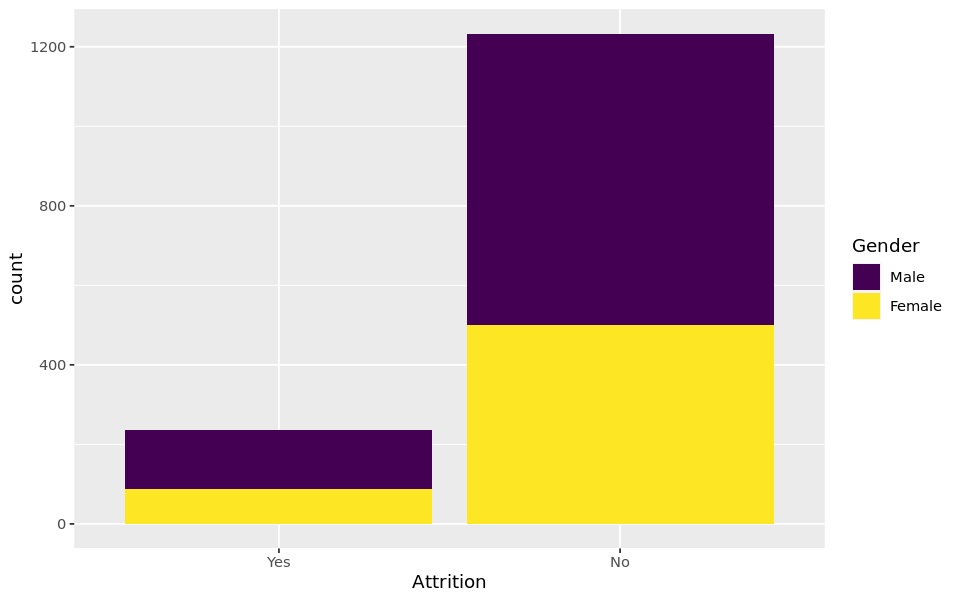

In [627]:
library(tidyverse); library(ggplot2)

options(repr.plot.width=8, repr.plot.height=5)

ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

# Examening the value 'Attrition', we see that there is an imbalance as the majority of data can be found in the category 'no'.
# The dataset is skewed.

<h5>The plot above gives us an idea of what proportions the datasets entirty consists of based on Attrition. <br>We notice a skewness which we will consider in our future interpertations.<h5>
<h5 style="color:blue;">Also we will keep in mind the option to under/over sample the dataset for future classification purposes.<h5>

<h3>In the following we will try to further explore our data by visualizing: <br>
<h5>How does the following parameters influence the attrition:<h5>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


In [628]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition =='Yes')
df_no <- filter(df, Attrition =='No')

<h2>JobSatisfaction<h2>
<h4>In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

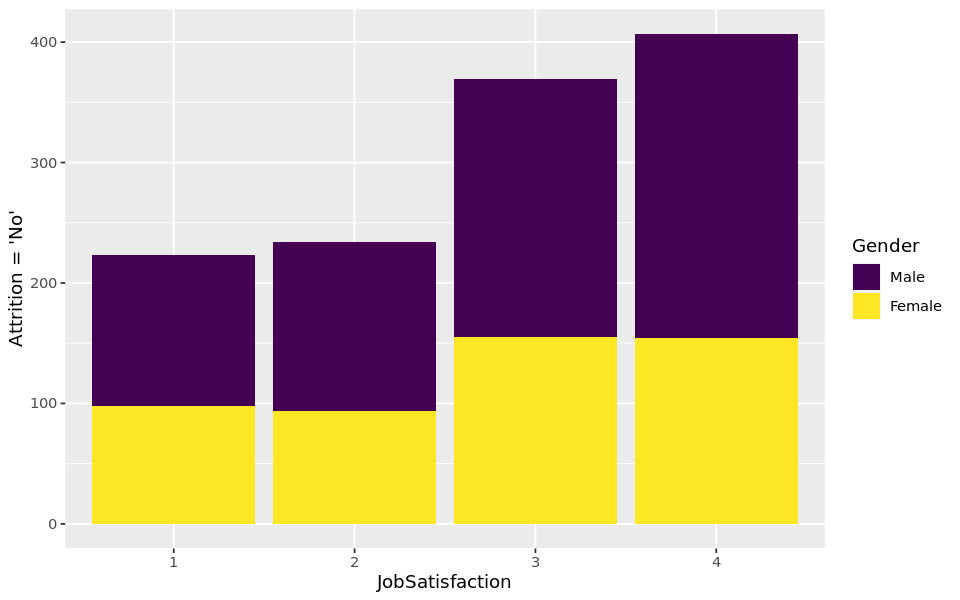

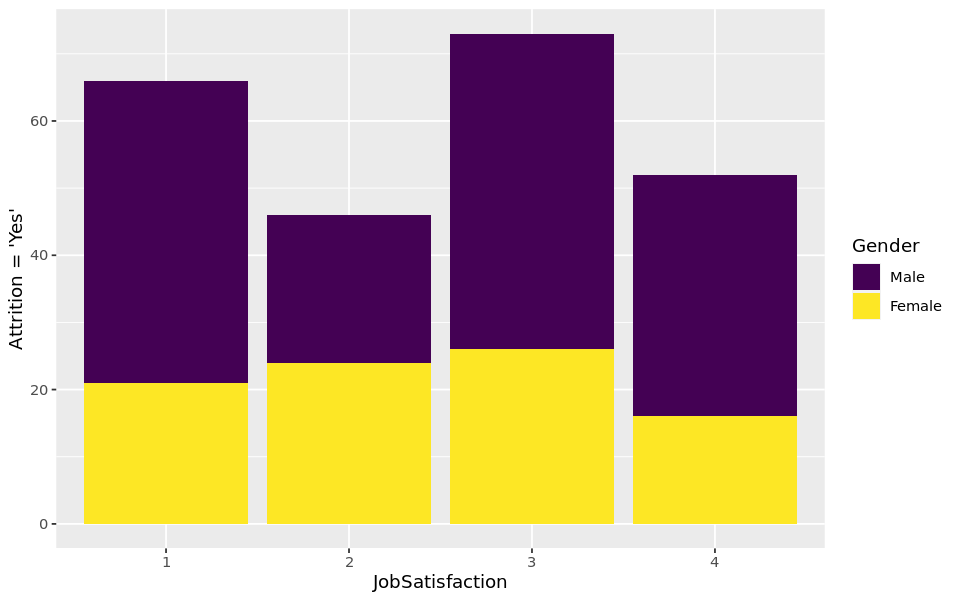

In [629]:
ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")

<h2>DistanceFromHome<h2>
<h4>In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

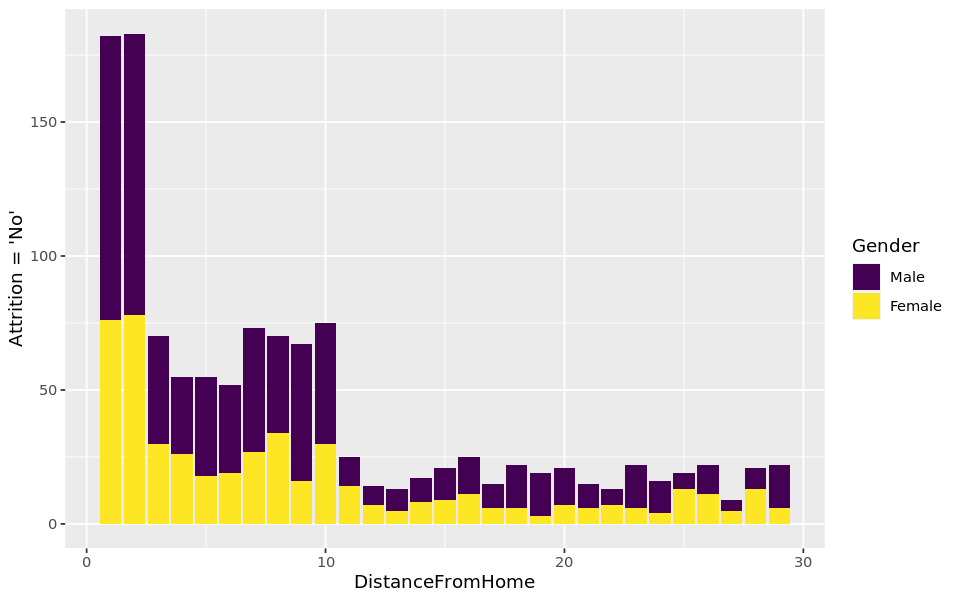

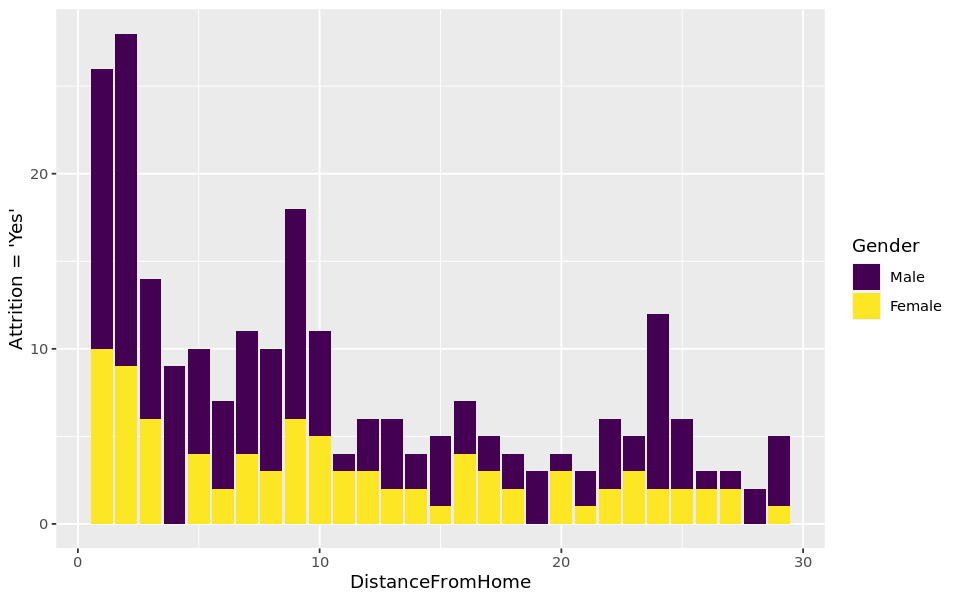

In [630]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")


<h2>MonthlyIncome<h2> 
<h4>In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


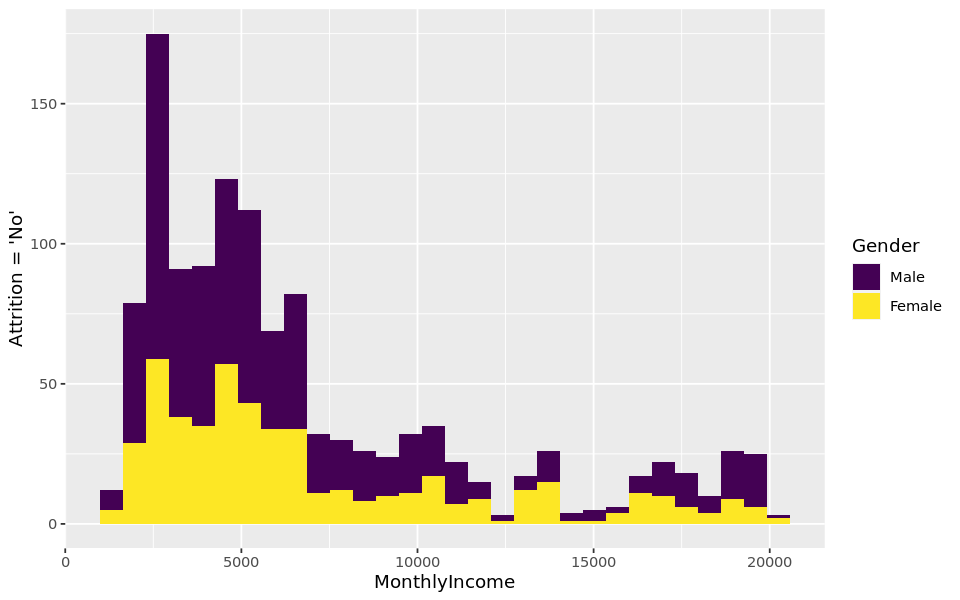

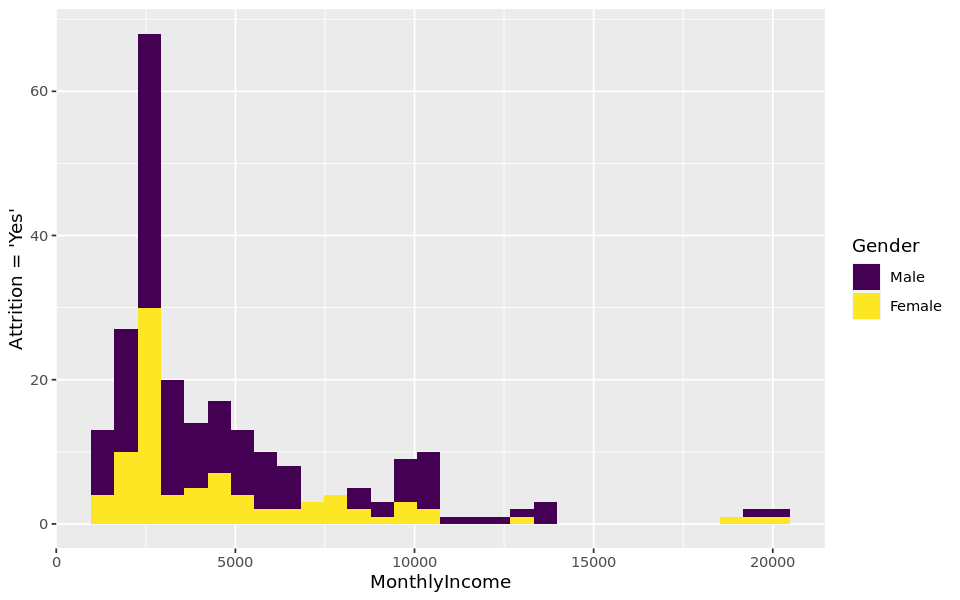

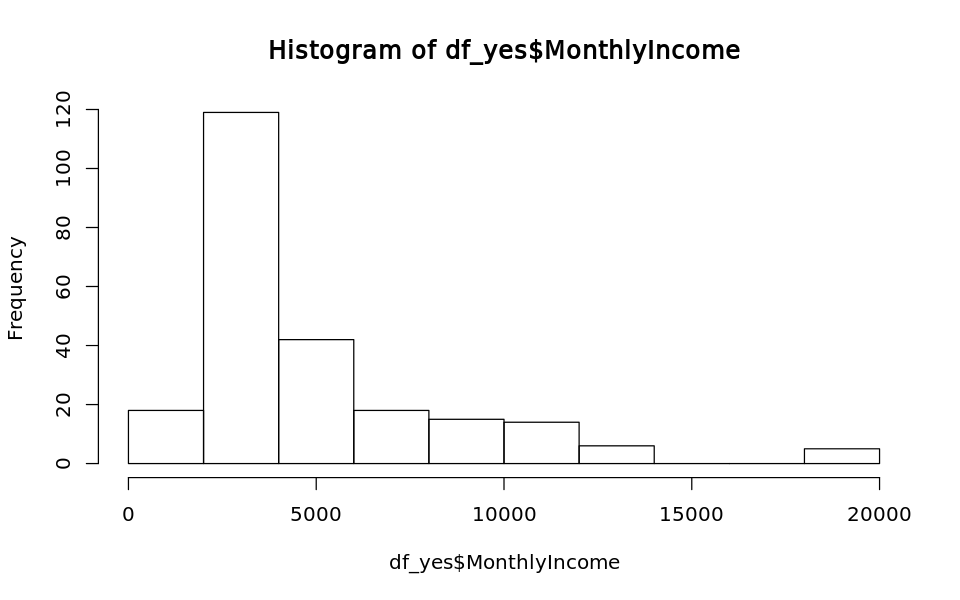

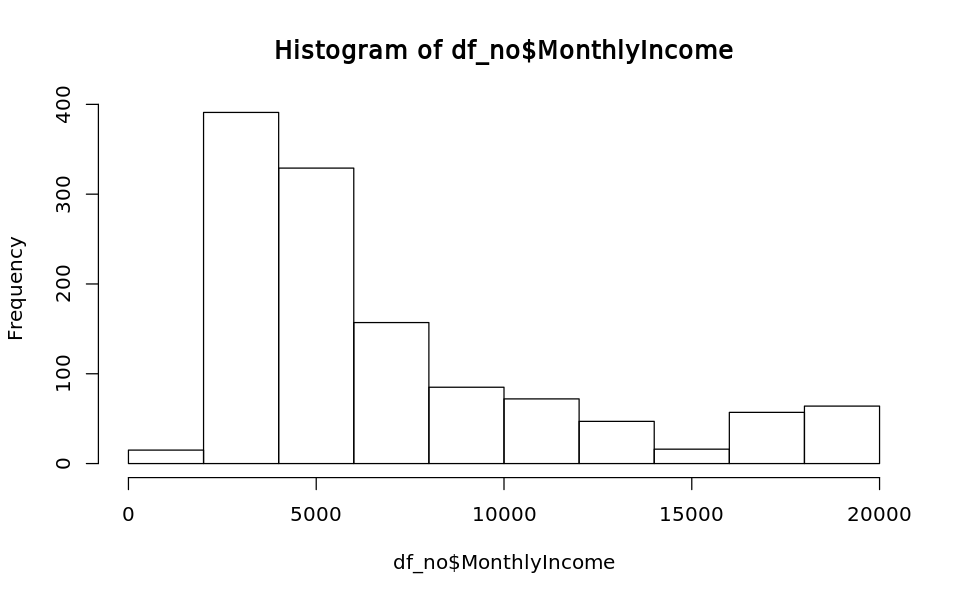

In [631]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'")
hist(df_yes$MonthlyIncome)
hist(df_no$MonthlyIncome)

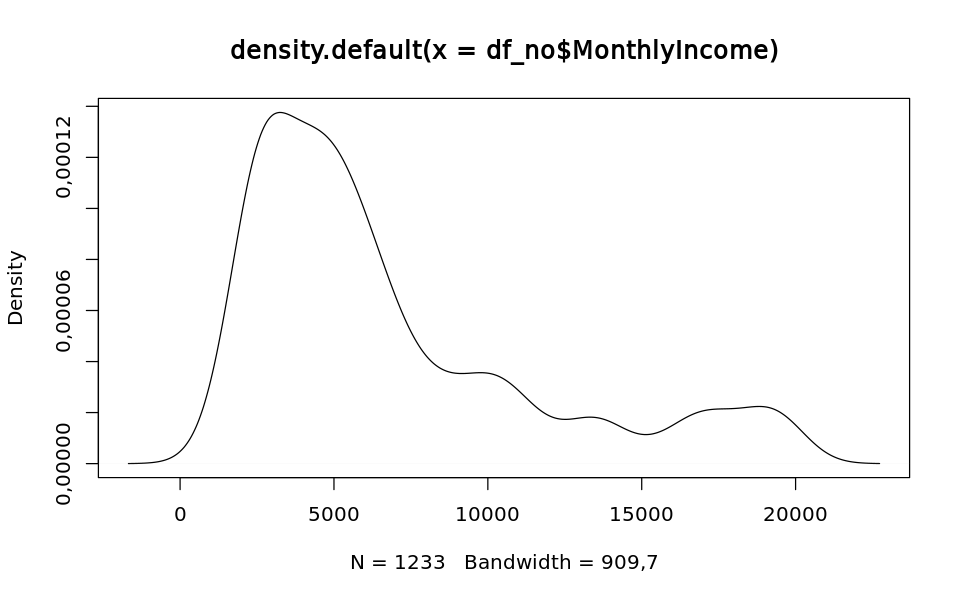

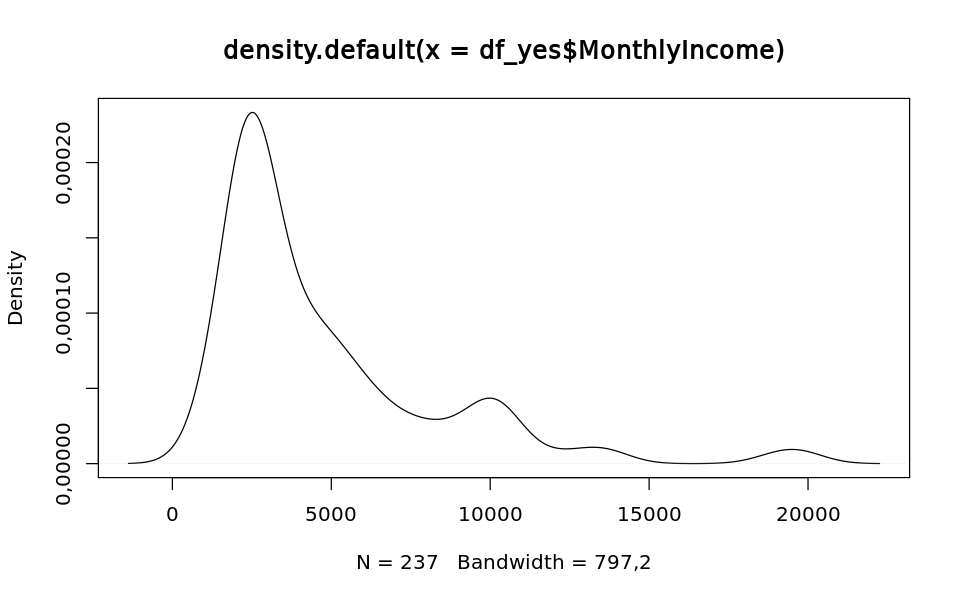

In [632]:
#Simple visualization of the distribution of MonthlyIncome
plot(density(df_no$MonthlyIncome))
plot(density(df_yes$MonthlyIncome))

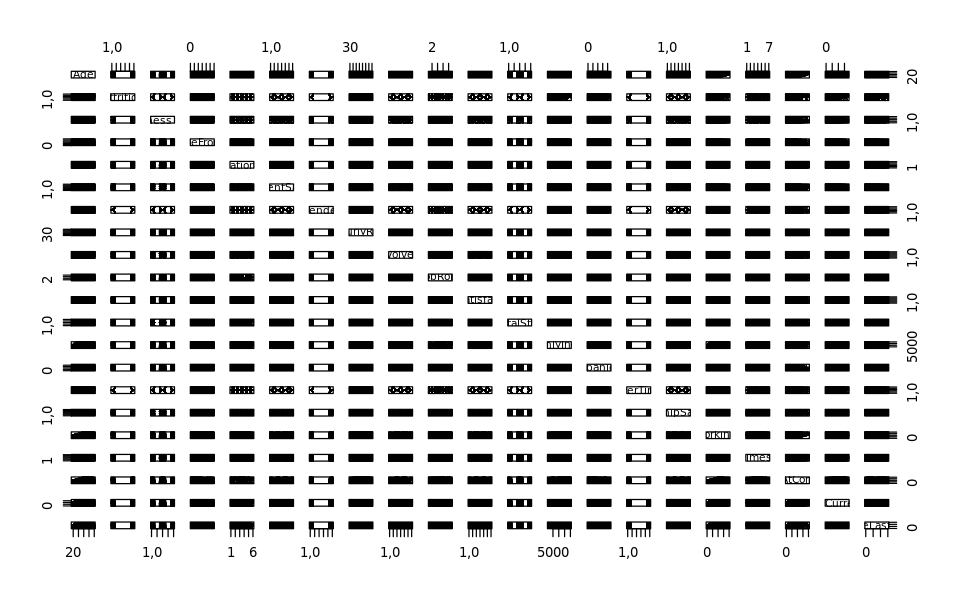

In [633]:
#facet_wrap or facet_grid 

#facet_wrap(~ align) 
#http://zevross.com/blog/2019/04/02/easy-multi-panel-plots-in-r-using-facet_wrap-and-facet_grid-from-ggplot2/

pairs(df)

<h3>Unsupervised learnin - clustering<h3>
<h5>In the following a clustering procedure is performed to designate an n amount of clusters for the data.<h5>

In [634]:
df$scaledAge <- as.numeric(scale(df$Age))
df$scaledIncome <- as.numeric(scale(df$MonthlyIncome))

data <- select(df, scaledAge, scaledIncome)
summary(data)
scaledData <- data
head(scaledData,3)

   scaledAge        scaledIncome    
 Min.   :-2,0715   Min.   :-1,1669  
 1st Qu.:-0,7579   1st Qu.:-0,7629  
 Median :-0,1011   Median :-0,3364  
 Mean   : 0,0000   Mean   : 0,0000  
 3rd Qu.: 0,6651   3rd Qu.: 0,3985  
 Max.   : 2,5260   Max.   : 2,8667  

scaledAge,scaledIncome
"0,44619856","-0,1083127"
"1,32191535","-0,2916193"
"0,00834016","-0,9373347"


<h4>ELBOW GRAPH: Checking the appropriate number of clusters<h4>

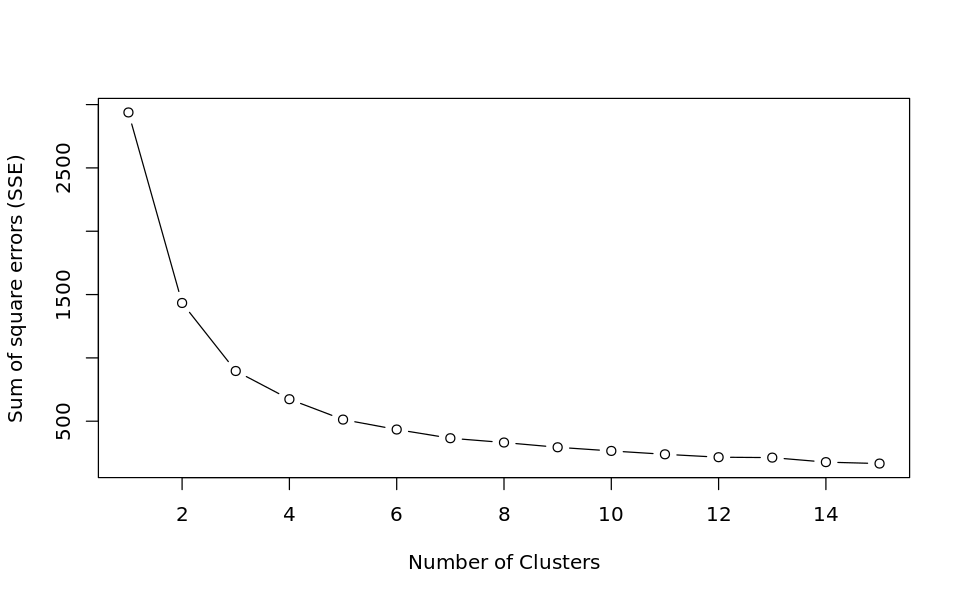

In [635]:
mydata <- scaledData
k_max <- 15
wss <- (nrow(mydata)-1)*sum(apply(mydata, 2, var))
for (i in 2:k_max) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:k_max, wss, type="b", xlab="Number of Clusters",
     ylab="Sum of square errors (SSE)")

<h4>In the following we can se the impact of not scaling the data:<h4>

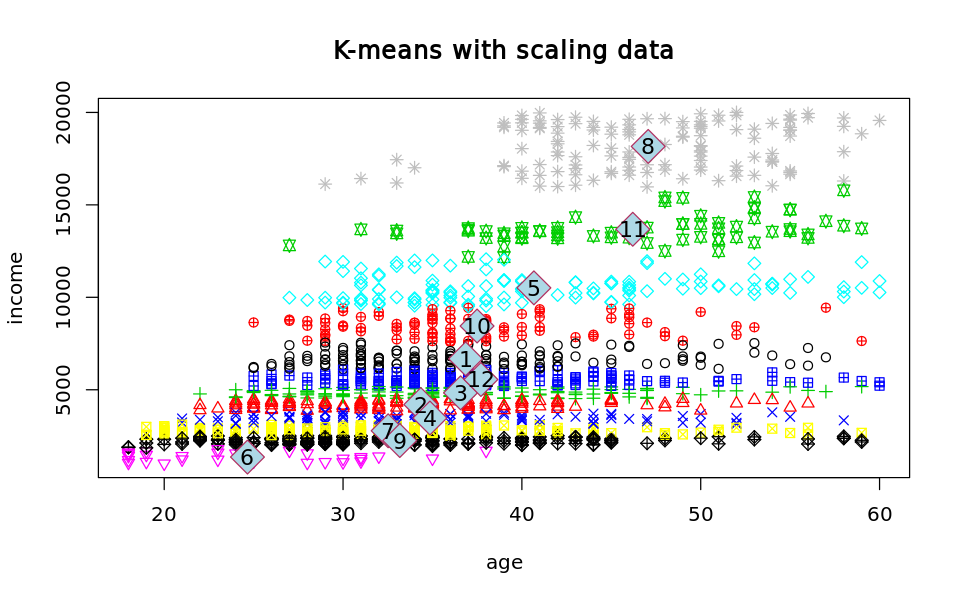

In [636]:
data_unscaled <- select(df, Age, MonthlyIncome)
Kmeans <- kmeans(data2, 12)

plot(data2$Age, data2$MonthlyIncome, col = Kmeans$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = Kmeans$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(Kmeans$centers[ ,1], Kmeans$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(Kmeans$centers[ ,1], Kmeans$centers[ ,2], cex = 1.1,
     col = 'black', attributes(Kmeans$centers)$dimnames[[1]])


<h4>In the following we can see the impact of scaling the data:<h4>

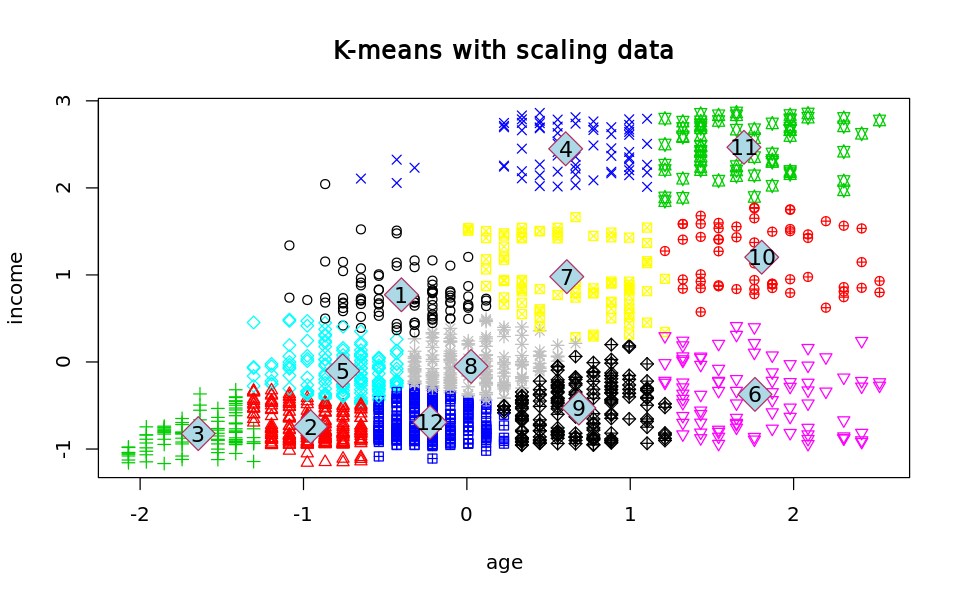

In [637]:
KmeansScaling <- kmeans(scaledData, 12)

plot(scaledData$scaledAge, scaledData$scaledIncome, col = KmeansScaling$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = KmeansScaling$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], cex = 1.1,
     col = 'black', attributes(KmeansScaling$centers)$dimnames[[1]])

<h3>Classification<h3>
<h5>In the following a logistic regression classifier is trained and tested.<h5>

In [638]:
# Installing the package
#install.packages("caTools")    # For Logistic regression
#install.packages("ROCR")       # For ROC curve to evaluate model   
# Loading package
library(caTools)

#Balancing data: (undersampling)
yes <- which(df$Attrition == 'Yes')
no <- which(df$Attrition == 'No')
no <- sample(no, length(yes))
df <- df[c(no,yes),] 
df

#Converting Yes and No to 1 and 0:
df$Attrition <- ifelse(df$Attrition == 'Yes', 1, 0)

#Train/test split and Classification:
split <- sample.split(df, SplitRatio = 0.7)
   
train_reg <- subset(df, split == "TRUE")
test_reg <- subset(df, split == "FALSE")


logistic_model <- glm(Attrition ~., 
                      data = train_reg, 
                      family = "binomial")
   
# Summary
summary(logistic_model)
   
# Predict test data based on model
predict_reg <- predict(logistic_model, 
                       test_reg, type = "response")
predict_reg  

,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,scaledAge,scaledIncome
769,40,No,Travel_Rarely,26,Marketing,3,Male,74,3,Sales Executive,...,1,No,2,8,3,7,7,7,"0,33673396","0,4020998481"
748,38,No,Travel_Rarely,3,Life Sciences,2,Male,42,3,Sales Executive,...,8,Yes,3,19,1,1,0,0,"0,11780476","0,0760560736"
1220,29,No,Travel_Rarely,9,Medical,4,Female,43,3,Laboratory Technician,...,9,No,3,9,2,5,3,1,"-0,86737664","-0,7495674780"
29,44,No,Travel_Rarely,7,Medical,1,Female,42,2,Healthcare Representative,...,3,No,4,24,4,22,6,5,"0,77459236","0,7954764413"
737,48,No,Travel_Rarely,4,Life Sciences,3,Male,78,2,Healthcare Representative,...,7,No,2,27,3,15,11,4,"1,21245075","0,9549936235"
1165,40,No,Travel_Rarely,16,Life Sciences,3,Female,84,3,Manufacturing Director,...,6,Yes,4,18,2,4,2,3,"0,33673396","0,3063045763"
62,38,No,Travel_Frequently,29,Life Sciences,4,Female,50,3,Laboratory Technician,...,1,No,4,10,2,10,3,9,"0,11780476","-0,8702142949"
232,42,No,Travel_Rarely,4,Technical Degree,3,Male,58,3,Manager,...,1,No,4,22,3,22,17,11,"0,55566316","2,7037352495"
269,45,No,Travel_Rarely,20,Medical,3,Male,79,3,Healthcare Representative,...,0,Yes,2,21,2,20,7,4,"0,88405696","1,4853723238"
1046,40,No,Travel_Rarely,2,Medical,3,Male,68,3,Research Scientist,...,2,No,3,8,3,3,1,1,"0,33673396","-0,8831710834"


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2,2355  -0,5702  -0,0164   0,5771   3,1171  

Coefficients: (2 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2,2772445  1,2669644  -1,797 0,072272 .  
Age                        -0,0371256  0,0251743  -1,475 0,140281    
BusinessTravel.L           -1,7196885  0,5581280  -3,081 0,002062 ** 
BusinessTravel.Q           -1,9760850  0,4937506  -4,002 6,28e-05 ***
DistanceFromHome            0,0645517  0,0227199   2,841 0,004495 ** 
EducationField.L            0,4969026  0,7988941   0,622 0,533950    
EducationField.Q           -0,3214852  0,7575009  -0,424 0,671272    
EducationField.C           -0,4890149  0,6661621  -0,734 0,462901    
EducationField^4            0,0735544  0,5835541   0,126 0,899696    
EducationField^5           -0,6529229  0,4952768  -1,31

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

737          232          385          734         1116          433 
0,0459724628 0,0424544478 0,2921710269 0,0042343164 0,6006796105 0,0475725865 
        1408          450          943          580          815          755 
0,0632048383 0,4662954530 0,4704111573 0,3486302154 0,4095816744 0,3023070409 
         552          587         1337         1463         1055           24 
0,0331130471 0,0213492362 0,1747148430 0,6475251804 0,0011316209 0,4362664787 
        1302         1364          923          834         1090          572 
0,0065875208 0,1822696846 0,0141740306 0,4487976245 0,8441136365 0,9853448958 
         651          283          955          170         1332          677 
0,0092172092 0,5169514327 0,0015127425 0,6694850918 0,0944220201 0,0363656035 
        1321          992         1050          618          744          889 
0,0287051776 0,3483853892 0,5465143446 0,3813942554 0,2723564619 0,0206443682 
         166          402          782          598          942         1446 
0,0092963664 0,3988530805 0,9816083991 0,1451909597 0,8575508604 0,1156270652 
         381         1126         1318         1359          472         1433 
0,2111083668 0,5596399924 0,6240446967 0,2057064269 0,0100987844 0,0087380938 
         273          361         1044          403         1079         1048 
0,2576473528 0,0080892504 0,0040098616 0,3473599589 0,2595530541 0,8421375758 
         156          708         1246         1203         1395         1083 
0,0231627118 0,0078296542 0,8890194450 0,2476267741 0,5851056755 0,9306845053 
         692           20          398           56          643         1362 
0,9503054252 0,5505872656 0,3222305535 0,4848885830 0,8209205225 0,2776582850 
         387         1183          988          828          645            1 
0,3435104488 0,0004777271 0,0804161589 0,5902718608 0,3458805154 0,9664937171 
          22           27           37           43           51          125 
0,9610496885 0,9760476865 0,9270089102 0,9866053427 0,9770108763 0,8276404386 
         133          172          183          206          211          217 
0,7902912694 0,9970862391 0,9100493546 0,1292582659 0,5591083112 0,5613619304 
         272          294          324          337          367          369 
0,2070408021 0,8941350886 0,9885744822 0,9595950842 0,6470823024 0,7668762306 
         379          437          444          464          480          496 
0,1821984946 0,9904710580 0,9592964382 0,9886486445 0,9313085356 0,4591431774 
         505          515          586          596          609          637 
0,8379209837 0,9979353491 0,3213505281 0,2095083989 0,0558404824 0,9386571067 
         661          663          667          707          721          733 
0,8224583682 0,7568656730 0,1480261382 0,1482340832 0,7488512591 0,9405529078 
         749          762          763          778          801          829 
0,9562589577 0,6734076461 0,9763308831 0,8663855978 0,9726631197 0,6621872368 
         837          843          861          865          893          948 
0,6607610295 0,5022770480 0,2044851026 0,5662367820 0,7007249532 0,9027144722 
         967          982          998         1013         1017         1032 
0,5231158954 0,7886107721 0,8479788842 0,9443485713 0,3234003704 0,5320711037 
        1069         1086         1112         1137         1168         1172 
0,9534610974 0,8900014971 0,0012488328 0,7976886494 0,9746866773 0,9529052799 
        1202         1250         1263         1280         1291         1299 
0,9956002653 0,9472106251 0,9638739468 0,4425082907 0,8386769132 0,1305427992 
        1313         1327         1376         1396         1443         1453 
0,1980217694 0,8714829729 0,9074006210 0,8361618383 0,9272925271 0,2079996170

In [639]:
# Changing probabilities
predict_reg <- ifelse(predict_reg > 0.5, 1, 0)
   
# Evaluating model accuracy
# using confusion matrix
table(test_reg$Attrition, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Attrition)
print(paste('Accuracy =', 1 - missing_classerr))

   predict_reg
     0  1
  0 52 19
  1 16 57

[1] "Accuracy = 0,756944444444444"


<h3>ROC CURVE<h3>
<h5>ROC curve visualization for a visual representation of the classifiers accuracy.<h5>

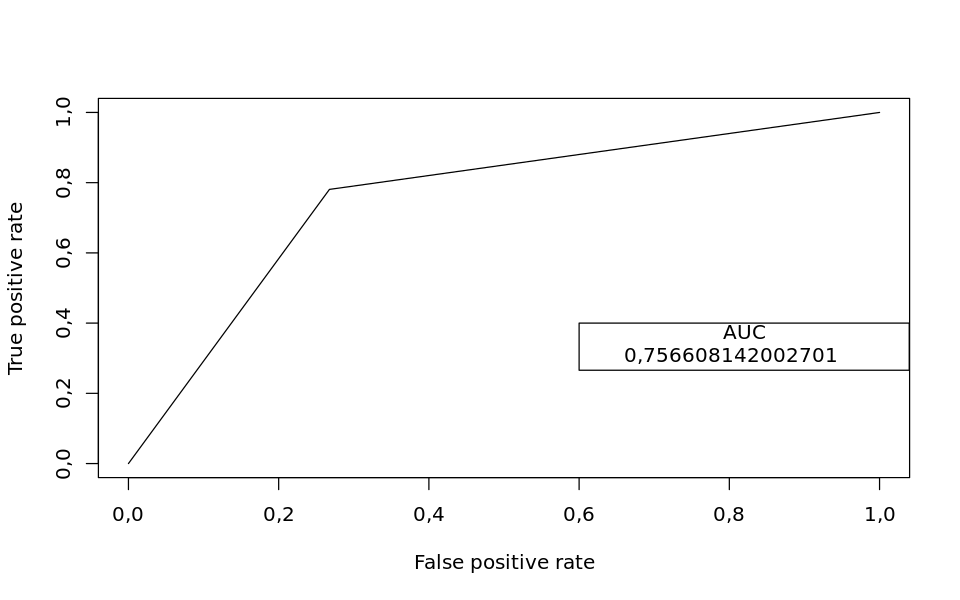

In [640]:
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Attrition) 
ROCPer <- performance(ROCPred, measure = "tpr", 
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
   
# Plotting curve
plot(ROCPer)


legend(.6, .4, auc, title = "AUC", cex = 1)